## Introduction

**_Poonam Ligade_**

*30th Jan 2017*

I am trying to predict for how much money each house can be sold??

In this mainly we will look at data exploration and visulization part

EDA is often most tedious and boring job.

But the more time you spend here on understanding, cleaning and preparing data the better fruits your predictive model will bare!!

Lets start.

1) **Introduction**

  1. Import Libraries
  2. Load data
  3. Variable Identification
  4. Run Statistical summeries
  5. Correlation with target variable

 
2) **Missing values imputation**

  1. Figure out missing value columns
  2. Fill out missingness


3) **Visualizations**

 1. Univariate Analysis
 2. Bivariate Analysis




**Import libraries**
====================


In [146]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)
sns.set(font_scale=1)

from sklearn.linear_model import LinearRegression

**Load train & test data**
====================


In [147]:
houses=pd.read_csv("train.csv")
houses.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [148]:
houses_test = pd.read_csv("test.csv")
#transpose
houses_test.head()
#note their is no "SalePrice" column here which is our target varible.

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [149]:
#shape command will give number of rows/samples/examples and number of columns/features/predictors in dataset
#(rows,columns)
houses.shape

(1460, 81)

There are total 1460 samples which we can use to train model and 80 features and 1 target variable.

In [150]:
houses_test.shape
#1 column less because target variable isn't there in test set!

(1459, 80)

*Variable Identification*
-----------------------

In [152]:
#info method provides information about dataset like 
#total values in each column, null/not null, datatype, memory occupied etc
houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [153]:
#How many columns with different datatypes are there?
houses.get_dtype_counts()

float64     3
int64      35
object     43
dtype: int64

In [154]:
##Describe gives statistical information about numerical columns in the dataset
houses.describe()

/Users/vishnu/miniconda2/envs/tensorflow/lib/python3.5/site-packages/numpy/lib/function_base.py:3823: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,NaN,7553.500000,5.000000,5.000000,1954.000000,1967.000000,NaN,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,NaN,9478.500000,6.000000,5.000000,1973.000000,1994.000000,NaN,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,NaN,11601.500000,7.000000,6.000000,2000.000000,2004.000000,NaN,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


**Correlation in Data**
====================


In [155]:
corr=houses.corr()["SalePrice"]
corr[np.argsort(corr, axis=0)[::-1]]

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

OverallQual ,GrLivArea ,GarageCars,GarageArea ,TotalBsmtSF,1stFlrSF     ,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd have more than 0.5 correlation with SalePrice. 

EnclosedPorch and KitchenAbvGr  have little negative correlation with target variable.

These can prove to be important features to predict SalePrice.

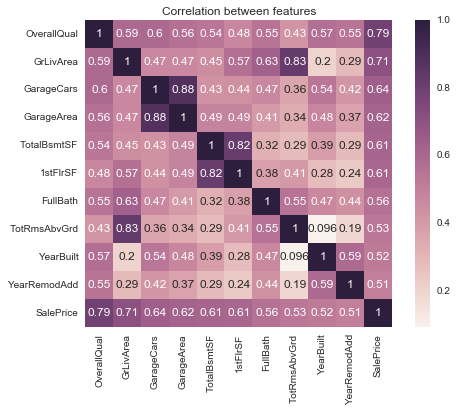

In [156]:
corr=houses[['OverallQual' ,'GrLivArea' ,'GarageCars','GarageArea' ,
            'TotalBsmtSF','1stFlrSF','FullBath','TotRmsAbvGrd',
            'YearBuilt','YearRemodAdd','SalePrice']].corr()#["SalePrice"]
#plt.figure(figsize=(10, 10))

sns.heatmap(corr, vmax=1, square=True,annot=True)
plt.title('Correlation between features')

In [157]:
correlations=houses.corr()
attrs = correlations.iloc[:-1,:-1] # all except target

threshold = 0.5
important_corrs = (attrs[abs(attrs) > threshold][attrs != 1.0]) \
    .unstack().dropna().to_dict()

unique_important_corrs = pd.DataFrame(
    list(set([(tuple(sorted(key)), important_corrs[key]) \
    for key in important_corrs])), 
        columns=['Attribute Pair', 'Correlation'])

    # sorted by absolute value
unique_important_corrs = unique_important_corrs.ix[
    abs(unique_important_corrs['Correlation']).argsort()[::-1]]

unique_important_corrs


,Attribute Pair,Correlation
17,"(GarageArea, GarageCars)",0.882475
24,"(GarageYrBlt, YearBuilt)",0.825667
12,"(GrLivArea, TotRmsAbvGrd)",0.825489
14,"(1stFlrSF, TotalBsmtSF)",0.819530
2,"(2ndFlrSF, GrLivArea)",0.687501
10,"(BedroomAbvGr, TotRmsAbvGrd)",0.676620
22,"(BsmtFinSF1, BsmtFullBath)",0.649212
7,"(GarageYrBlt, YearRemodAdd)",0.642277
0,"(FullBath, GrLivArea)",0.630012
26,"(2ndFlrSF, TotRmsAbvGrd)",0.616423


This shows multicollinearity.
In regression, "multicollinearity" refers to features that are correlated with other features.  Multicollinearity occurs when your model includes multiple factors that are correlated not just to your target variable, but also to each other.

Problem:

Multicollinearity increases the standard errors of the coefficients.
That means, multicollinearity makes some variables statistically insignificant when they should be significant.

To avoid this we can do 3 things:

1. Completely remove those variables
2. Make new feature by adding them or by some other operation.
3. Use PCA, which will reduce feature set to small number of non-collinear features.

Reference:http://blog.minitab.com/blog/understanding-statistics/handling-multicollinearity-in-regression-analysis

*Pivotal Features:*

In [158]:
houses[['OverallQual','SalePrice']].groupby(['OverallQual'],
as_index=False).mean().sort_values(by='OverallQual', ascending=False)


,OverallQual,SalePrice
9,10,438588
8,9,367513
7,8,274735
6,7,207716
5,6,161603
4,5,133523
3,4,108420
2,3,87473
1,2,51770
0,1,50150


In [159]:
houses[['GarageCars','SalePrice']].groupby(['GarageCars'],
as_index=False).mean().sort_values(by='GarageCars', ascending=False)


,GarageCars,SalePrice
4,4,192655
3,3,309636
2,2,183851
1,1,128116
0,0,103317


In [160]:
houses[['Fireplaces','SalePrice']].groupby(['Fireplaces'],
as_index=False).mean().sort_values(by='Fireplaces', ascending=False)

,Fireplaces,SalePrice
3,3,252000
2,2,240588
1,1,211843
0,0,141331


**Missing Value Imputation**
====================


Missing values in the training data set can affect prediction or classification of a model negatively.

Also some machine learning algorithms can't accept missing data eg. SVM.

But filling missing values with mean/median/mode or using another predictive model to predict missing values is also a prediction which may not be 100% accurate, instead you can use models like Decision Trees and Random Forest which handle missing values very well.

Some of this part is based on this kernel: https://www.kaggle.com/meikegw/house-prices-advanced-regression-techniques/filling-up-missing-values


In [161]:
#lets see if there are any columns with missing values 
null_columns=houses.columns[houses.isnull().any()]
houses[null_columns].isnull().sum()

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

*LotFrontage*
-----------------------

We can see if there is some correlation between LotArea and LotFrontage

In [162]:
houses['LotFrontage'].corr(houses['LotArea'])

0.42609501877180794

This is not great, we will try some polynomial expressions like squareroot 

In [163]:
houses['SqrtLotArea']=np.sqrt(houses['LotArea'])
houses['LotFrontage'].corr(houses['SqrtLotArea'])

0.60200221679393606

0.60 looks good to go.

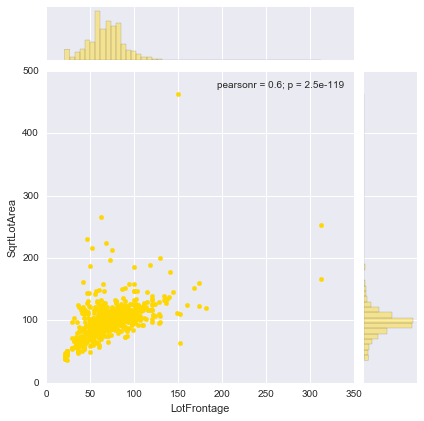

In [164]:
sns.jointplot(houses['LotFrontage'],houses['SqrtLotArea'],color='gold')

In [165]:
filter = houses['LotFrontage'].isnull()
houses.LotFrontage[filter]=houses.SqrtLotArea[filter]

/Users/vishnu/miniconda2/envs/tensorflow/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


*MasVnrType and MasVnrArea*
-----------------------

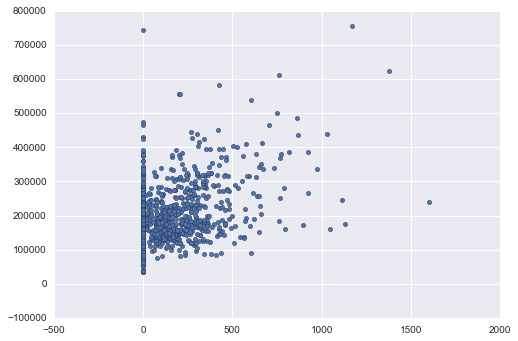

In [216]:
plt.scatter(houses["MasVnrArea"],houses["SalePrice"])
plt.show()

/Users/vishnu/miniconda2/envs/tensorflow/lib/python3.5/site-packages/pandas/tools/plotting.py:968: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"


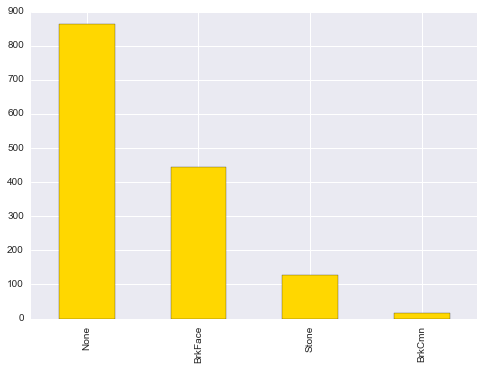

In [167]:
houses["MasVnrType"].value_counts().plot(kind='bar',colors='gold')

In [168]:
houses["MasVnrType"] = houses["MasVnrType"].fillna('None')
houses["MasVnrArea"] = houses["MasVnrArea"].fillna(0.0)

*Electrical*
-----------------------

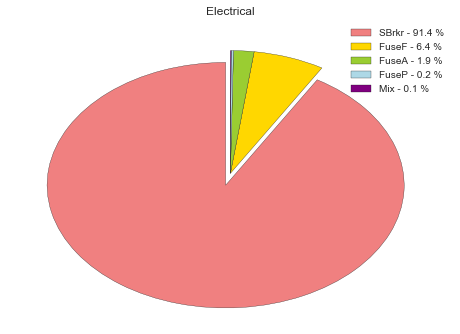

In [169]:
labels = houses["Electrical"].unique()
sizes = houses["Electrical"].value_counts().values
explode=[0.1,0,0,0,0]
parcent = 100.*sizes/sizes.sum()
labels = ['{0} - {1:1.1f} %'.format(i,j) for i,j in zip(labels, parcent)]

colors = [  'lightcoral','gold','yellowgreen', 'lightblue','purple']
patches, texts= plt.pie(sizes, colors=colors,explode=explode,
                        startangle=90)
plt.legend(patches, labels, loc="best")

plt.title("Electrical")
plt.show()

In [170]:
#We can replace missing values with most frequent ones.
houses["Electrical"] = houses["Electrical"].fillna('SBrkr')

*Alley*
-----------------------

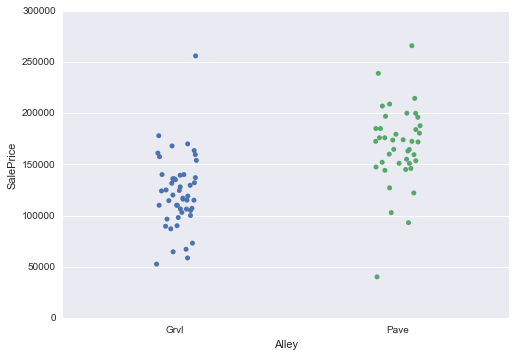

In [171]:
sns.stripplot(x=houses["Alley"], y=houses["SalePrice"],jitter=True)

All missing value indicate that particular house doesn't have an alley access.we can replace it with 'None'.

In [172]:
houses["Alley"] = houses["Alley"].fillna('None')

*Basement Features*
-----------------------

All missing value indicate that particular house doesn't have an alley access.we can replace it with 'None'.

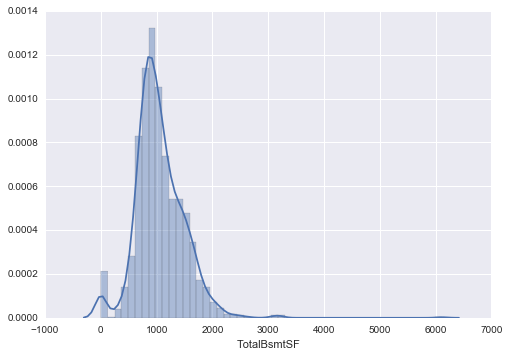

In [173]:
sns.distplot(houses["TotalBsmtSF"])

In [174]:
basement_cols=['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','BsmtFinSF1','BsmtFinSF2']
houses[basement_cols][houses['BsmtQual'].isnull()==True]

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtFinSF1,BsmtFinSF2
17,NaN,NaN,NaN,NaN,NaN,0,0
39,NaN,NaN,NaN,NaN,NaN,0,0
90,NaN,NaN,NaN,NaN,NaN,0,0
102,NaN,NaN,NaN,NaN,NaN,0,0
156,NaN,NaN,NaN,NaN,NaN,0,0
182,NaN,NaN,NaN,NaN,NaN,0,0
259,NaN,NaN,NaN,NaN,NaN,0,0
342,NaN,NaN,NaN,NaN,NaN,0,0
362,NaN,NaN,NaN,NaN,NaN,0,0
371,NaN,NaN,NaN,NaN,NaN,0,0


All categorical variables contains NAN whereas continuous ones have 0.
So that means there is no basement for those houses.

In [175]:
for col in basement_cols:
    if 'FinSF'not in col:
        houses[col] = houses[col].fillna('None')

*Fireplaces*
-----------------------

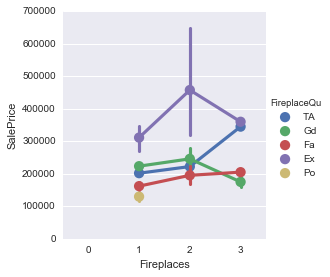

In [176]:
sns.factorplot("Fireplaces","SalePrice",data=houses,hue="FireplaceQu")

Having 2 fireplaces increases house price and fireplace of Excellent quality is a big plus. 

In [177]:
#If fireplace quality is missing that means that house doesn't have a fireplace
houses["FireplaceQu"] = houses["FireplaceQu"].fillna('None')
pd.crosstab(houses.Fireplaces, houses.FireplaceQu)

FireplaceQu,Ex,Fa,Gd,None,Po,TA
Fireplaces,,,,,,
0,0,0,0,690,0,0
1,19,28,324,0,20,259
2,4,4,54,0,0,53
3,1,1,2,0,0,1


*Garages*
-----------------------

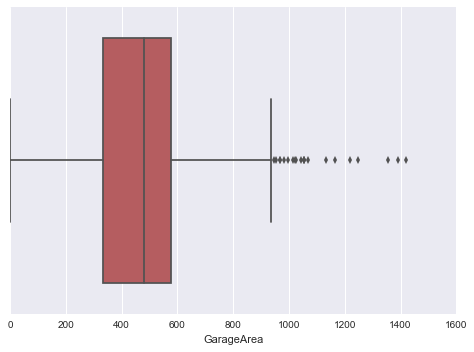

In [178]:
sns.boxplot(houses["GarageArea"],color='r')

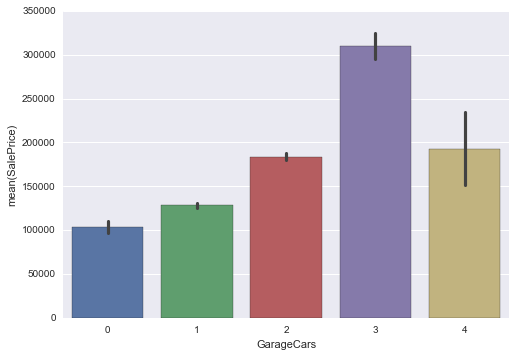

In [179]:
sns.barplot(houses["GarageCars"],houses["SalePrice"])

In [181]:
garage_cols=['GarageType','GarageQual','GarageCond','GarageYrBlt','GarageFinish','GarageCars','GarageArea']
houses[garage_cols][houses['GarageType'].isnull()==True]

,GarageType,GarageQual,GarageCond,GarageYrBlt,GarageFinish,GarageCars,GarageArea
39,NaN,NaN,NaN,NaN,NaN,0,0
48,NaN,NaN,NaN,NaN,NaN,0,0
78,NaN,NaN,NaN,NaN,NaN,0,0
88,NaN,NaN,NaN,NaN,NaN,0,0
89,NaN,NaN,NaN,NaN,NaN,0,0
99,NaN,NaN,NaN,NaN,NaN,0,0
108,NaN,NaN,NaN,NaN,NaN,0,0
125,NaN,NaN,NaN,NaN,NaN,0,0
127,NaN,NaN,NaN,NaN,NaN,0,0
140,NaN,NaN,NaN,NaN,NaN,0,0


All garage related features are missing values in same rows.
that means we can replace categorical variables with None and continuous ones with 0.

In [182]:
for col in garage_cols:
    if houses[col].dtype==np.object:
        houses[col] = houses[col].fillna('None')
    else:
        houses[col] = houses[col].fillna(0)

*Pool*
-----------------------

In [193]:
#If PoolArea is 0, that means that house doesn't have a pool.
#So we can replace PoolQuality with None.
houses["PoolQC"] = houses["PoolQC"].fillna('None')

*Fence*
-----------------------

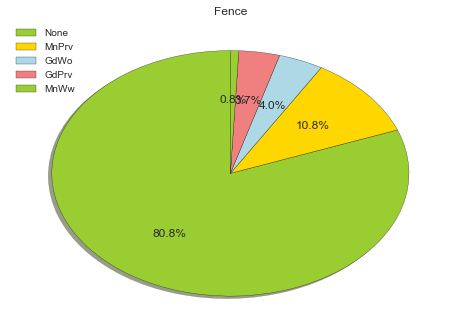

In [195]:
labels = houses["Fence"].unique()
sizes = houses["Fence"].value_counts().values
explode=[0.1,0,0,0]
parcent = 100.*sizes/sizes.sum()
#labels = ['{0} - {1:1.1f} %'.format(i,j) for i,j in zip(labels, parcent)]

colors = ['yellowgreen', 'gold', 'lightblue', 'lightcoral']
patches, texts,autotexts= plt.pie(sizes, colors=colors,autopct="%1.1f%%",
                        shadow=True,startangle=90)
plt.legend(patches, labels, loc="best")

plt.title("Fence")
plt.show()

Fence has got 1179 null values.
We can safely assume that those houses doesn't have a Fence and replace those values with None.

In [196]:
houses["Fence"] = houses["Fence"].fillna('None')


*MiscFeature*
-----------------------

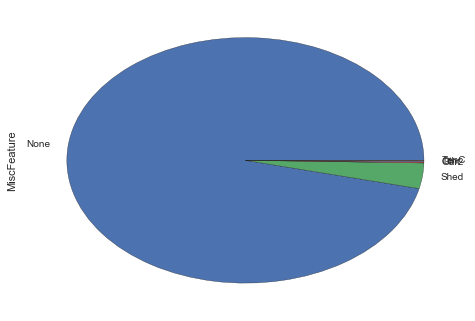

In [197]:
houses["MiscFeature"].value_counts().plot(kind='pie')

In [198]:
#Some houses don't have miscellaneous features like shed, Tennis court etc..
houses["MiscFeature"] = houses["MiscFeature"].fillna('None')

In [199]:
#Let's confirm that we have removed all missing values
houses[null_columns].isnull().sum()

LotFrontage     0
Alley           0
MasVnrType      0
MasVnrArea      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
Electrical      0
FireplaceQu     0
GarageType      0
GarageYrBlt     0
GarageFinish    0
GarageQual      0
GarageCond      0
PoolQC          0
Fence           0
MiscFeature     0
dtype: int64

**Visualizations**
===================

*Univariate Analysis*
--------------------------

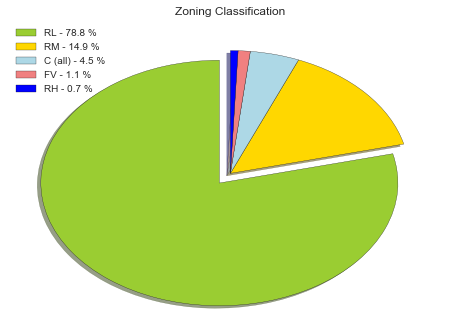

In [201]:
labels = houses["MSZoning"].unique()
sizes = houses["MSZoning"].value_counts().values
explode=[0.1,0,0,0,0]
parcent = 100.*sizes/sizes.sum()
labels = ['{0} - {1:1.1f} %'.format(i,j) for i,j in zip(labels, parcent)]

colors = ['yellowgreen', 'gold', 'lightblue', 'lightcoral','blue']
patches, texts= plt.pie(sizes, colors=colors,explode=explode,
                        shadow=True,startangle=90)
plt.legend(patches, labels, loc="best")

plt.title("Zoning Classification")
plt.show()

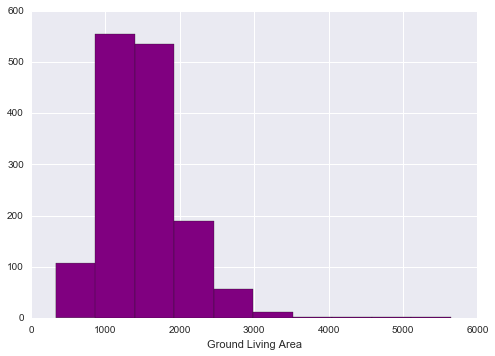

In [202]:
plt.hist(houses["GrLivArea"],color='purple')
plt.xlabel("Ground Living Area")
plt.show()

*Building And remodelling year of house*
-----------------------

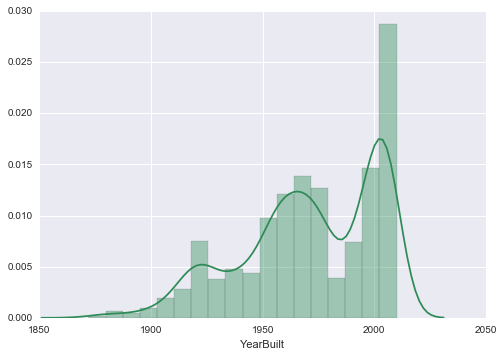

In [203]:
sns.distplot(houses["YearBuilt"],color='seagreen')

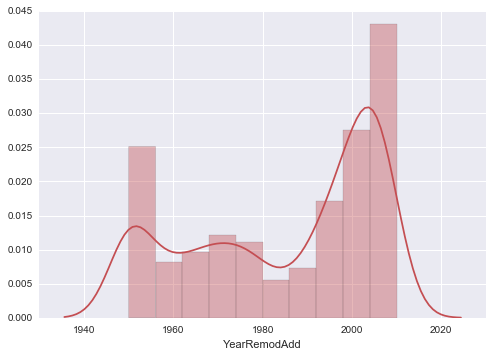

In [204]:
sns.distplot(houses["YearRemodAdd"],color='r')

*Heating and AC arrangements*
-----------------------

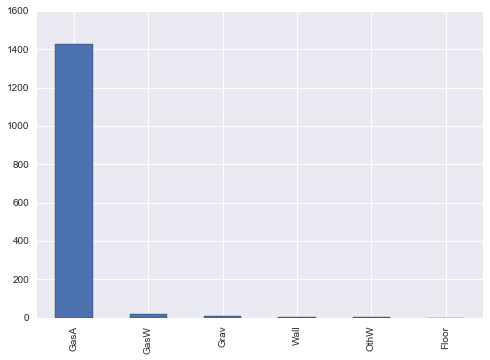

In [205]:
houses["Heating"].value_counts().plot(kind='bar')

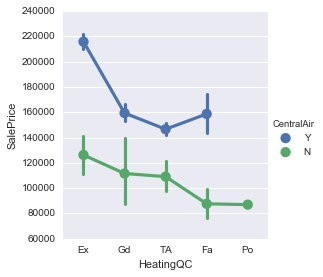

In [206]:
sns.factorplot('HeatingQC', 'SalePrice', hue = 'CentralAir', data=houses)

Having AC escalates price of house.

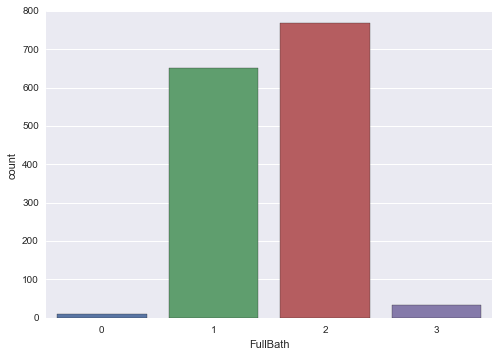

In [207]:
sns.countplot(houses["FullBath"])

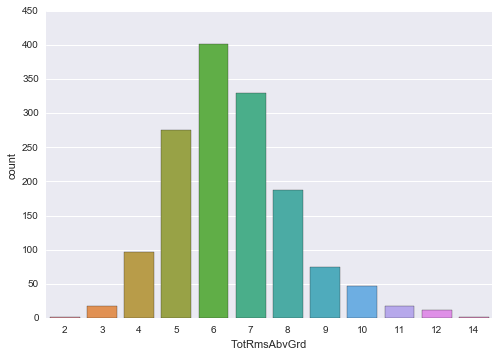

In [208]:
sns.countplot(houses["TotRmsAbvGrd"])

*Kitchen Features*
-----------------------

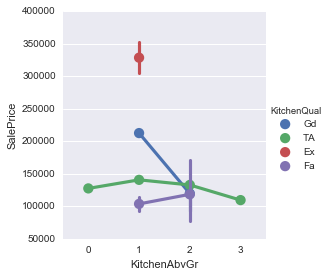

In [210]:
sns.factorplot("KitchenAbvGr","SalePrice",data=houses,hue="KitchenQual")

*Neighborhood*
-----------------------

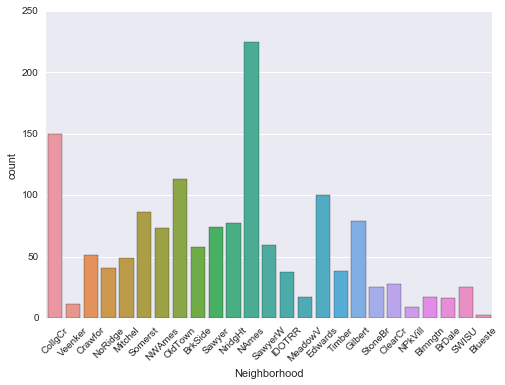

In [211]:
sns.countplot(x = 'Neighborhood', data = houses)
plt.xticks(rotation=45) 
plt.show()

*Bivariate Analysis*
------------------------

*With SalePrice*
-----------------------

<Container object of 1460 artists>

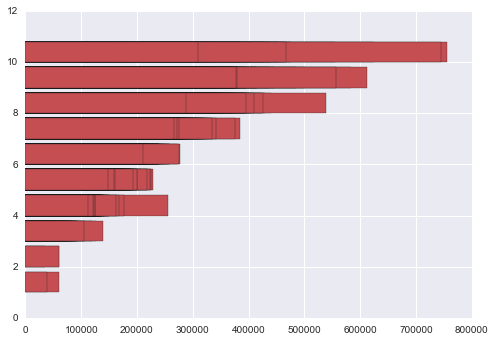

In [212]:
plt.barh(houses["OverallQual"],width=houses["SalePrice"],color="r")

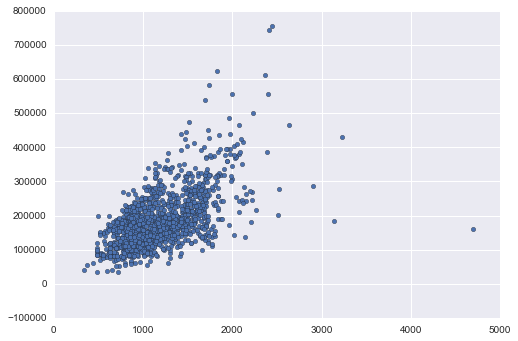

In [213]:
plt.scatter(houses["1stFlrSF"],houses["SalePrice"])
plt.show()

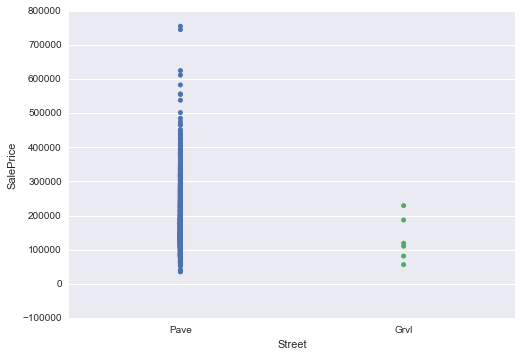

In [214]:
#street
sns.stripplot(x=houses["Street"], y=houses["SalePrice"])


More to come .. Watch this space.